### 구내식당 식수 인원 예측 AI 경진대회
정형 | 한국토지주택공사 | 식수예측 | MAE

https://dacon.io/competitions/official/235743/overview/description

### 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc('font', family='malgun gothic')

### 2. Data loading

In [3]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head(3)

(1205, 12)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [4]:
test = pd.read_csv("test.csv")

print(test.shape)
test.head(3)

(50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [5]:
submission = pd.read_csv("sample_submission.csv")

print(submission.shape)
submission.head(3)

(50, 3)


,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


### 3. Preprocessing
#### 3-1) missing values

In [6]:
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

##### Extra : missing value check

In [7]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

In [8]:
check_missing_col(train)

결측치가 존재하지 않습니다


[]

#### 3-2) rename colums

In [9]:
train.columns = ['일자', '요일', '정원수', '휴가자수', '출장자수', 
                 '시간외승인건수',
                 '재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식', '석식']

In [10]:
test.columns = ['일자', '요일', '정원수', '휴가자수', '출장자수', 
                '시간외승인건수',
                '재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴']

#### 3-3) date encoding

In [11]:
train["일자"].head(2)

0    2016-02-01
1    2016-02-02
Name: 일자, dtype: object

In [12]:
train["yy"] = pd.to_datetime(train["일자"]).dt.year
train["mm"] = pd.to_datetime(train["일자"]).dt.month
train["dd"] = pd.to_datetime(train["일자"]).dt.day
train["dw"] = pd.to_datetime(train["일자"]).dt.dayofweek
train["wy"] = pd.to_datetime(train["일자"]).dt.isocalendar().week   #OLD : dt.weekofyear

In [13]:
test["yy"] = pd.to_datetime(test["일자"]).dt.year
test["mm"] = pd.to_datetime(test["일자"]).dt.month
test["dd"] = pd.to_datetime(test["일자"]).dt.day
test["dw"] = pd.to_datetime(test["일자"]).dt.dayofweek
test["wy"] = pd.to_datetime(test["일자"]).dt.isocalendar().week   #OLD : dt.weekofyear

### 4. Analysis
#### 4-1) Label distribution

<AxesSubplot:xlabel='석식', ylabel='Density'>

findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.


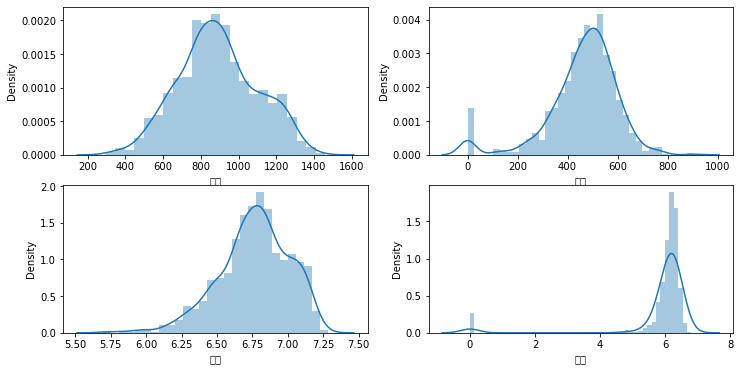

In [14]:
figure, ((a1,a2),(b1,b2)) = plt.subplots(2,2)
figure.set_size_inches(12,6)

sns.distplot(train["중식"], ax=a1)
sns.distplot(train["석식"], ax=a2)
sns.distplot(np.log(train["중식"]+1), ax=b1)
sns.distplot(np.log(train["석식"]+1), ax=b2)

In [15]:
print(train[train["석식"] == 0].shape)
train[train["석식"] == 0].head(2)

(43, 17)


,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식,석식,yy,mm,dd,dw,wy
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2016,11,30,2,48
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2016,12,28,2,52


#### 4-2) Visualization : 
##### datetime 

<AxesSubplot:xlabel='wy', ylabel='석식'>

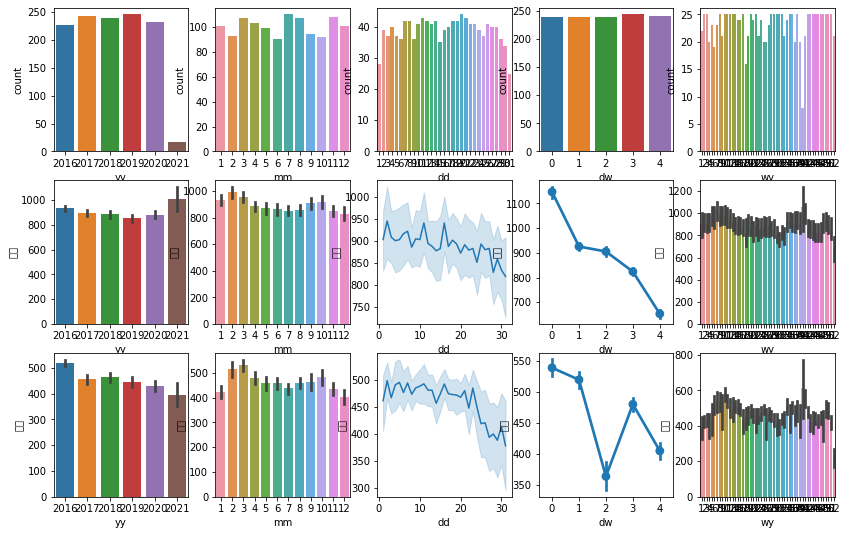

In [16]:
figure, ax = plt.subplots(3,5)
figure.set_size_inches(14,9)

sns.countplot(data=train, x="yy", ax=ax[0,0])
sns.countplot(data=train, x="mm", ax=ax[0,1])
sns.countplot(data=train, x="dd", ax=ax[0,2])
sns.countplot(data=train, x="dw", ax=ax[0,3])
sns.countplot(data=train, x="wy", ax=ax[0,4])

sns.barplot(data=train, x="yy", y='중식', ax=ax[1,0])
sns.barplot(data=train, x="mm", y='중식', ax=ax[1,1])
sns.lineplot(data=train, x="dd", y='중식', ax=ax[1,2])
sns.pointplot(data=train, x="dw", y='중식', ax=ax[1,3])
sns.barplot(data=train, x="wy", y='중식', ax=ax[1,4])

sns.barplot(data=train, x="yy", y='석식', ax=ax[2,0])
sns.barplot(data=train, x="mm", y='석식', ax=ax[2,1])
sns.lineplot(data=train, x="dd", y='석식', ax=ax[2,2])
sns.pointplot(data=train, x="dw", y='석식', ax=ax[2,3])
sns.barplot(data=train, x="wy", y='석식', ax=ax[2,4])

<AxesSubplot:xlabel='yymm', ylabel='중식'>

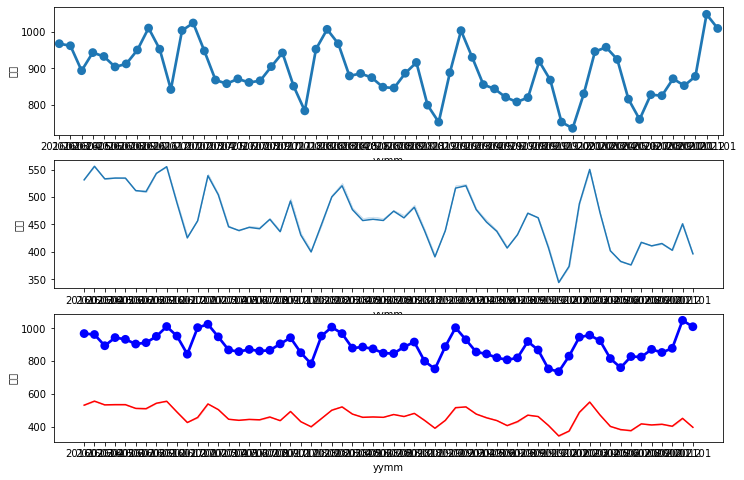

In [17]:
train["yymm"] = train['yy'].astype(str) + train["mm"].astype(str).str.zfill(2)

figure, (a1,a2,a3) = plt.subplots(3,1)
figure.set_size_inches(12,8)

sns.pointplot(data=train, x='yymm', y="중식", ax=a1, ci=False)
sns.lineplot(data=train, x='yymm', y="석식", ax=a2, ci=False)
sns.pointplot(data=train, x='yymm', y="중식", ax=a3, ci=False, color='b')
sns.lineplot(data=train, x='yymm', y="석식", ax=a3, ci=False, color='r')

##### 정원수,	휴가자수,	출장자수,	시간외승인건수,	재택근무자수

<AxesSubplot:xlabel='재택근무자수', ylabel='석식'>

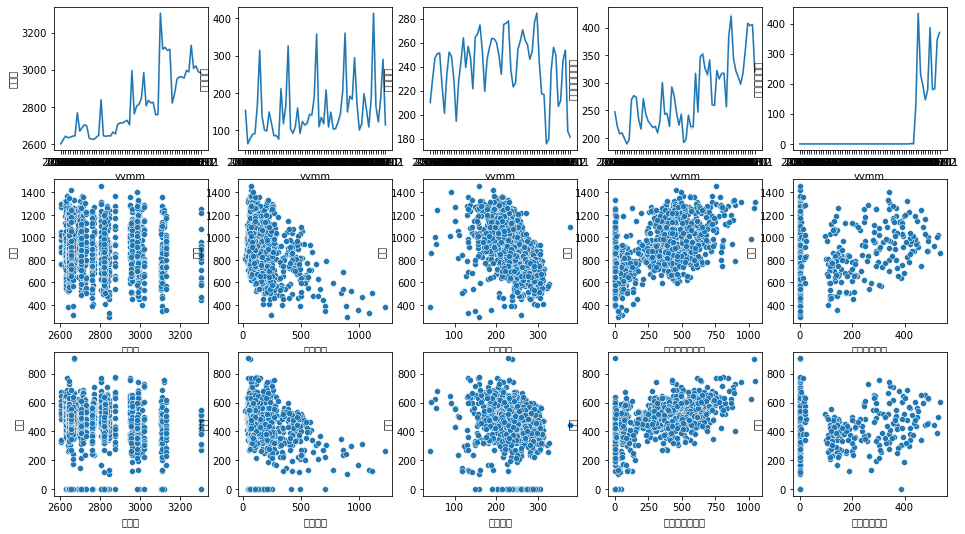

In [18]:
figure, ax = plt.subplots(3,5)
figure.set_size_inches(16,9)

sns.lineplot(data=train, x='yymm', y="정원수", ax=ax[0,0], ci=False)
sns.lineplot(data=train, x='yymm', y="휴가자수", ax=ax[0,1], ci=False)
sns.lineplot(data=train, x='yymm', y="출장자수", ax=ax[0,2], ci=False)
sns.lineplot(data=train, x='yymm', y="시간외승인건수", ax=ax[0,3], ci=False)
sns.lineplot(data=train, x='yymm', y="재택근무자수", ax=ax[0,4], ci=False)

sns.scatterplot(data=train, y='중식', x="정원수", ax=ax[1,0], ci=False)
sns.scatterplot(data=train, y='중식', x="휴가자수", ax=ax[1,1], ci=False)
sns.scatterplot(data=train, y='중식', x="출장자수", ax=ax[1,2], ci=False)
sns.scatterplot(data=train, y='중식', x="시간외승인건수", ax=ax[1,3], ci=False)
sns.scatterplot(data=train, y='중식', x="재택근무자수", ax=ax[1,4], ci=False)

sns.scatterplot(data=train, y='석식', x="정원수", ax=ax[2,0], ci=False)
sns.scatterplot(data=train, y='석식', x="휴가자수", ax=ax[2,1], ci=False)
sns.scatterplot(data=train, y='석식', x="출장자수", ax=ax[2,2], ci=False)
sns.scatterplot(data=train, y='석식', x="시간외승인건수", ax=ax[2,3], ci=False)
sns.scatterplot(data=train, y='석식', x="재택근무자수", ax=ax[2,4], ci=False)

<AxesSubplot:xlabel='yymm', ylabel='재택근무자수'>

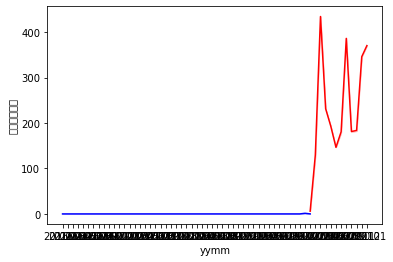

In [19]:
train["재택근무자수"].describe()
train.loc[train["재택근무자수"] == 0].count()
train.loc[train["재택근무자수"] == 0, "일자"].max()

train_sub1 = train[train["일자"] <= '2020-02-26']
train_sub2 = train[train["일자"] > '2020-02-26']

sns.lineplot(data=train_sub1, x='yymm', y="재택근무자수", ci=False, color='b')
sns.lineplot(data=train_sub2, x='yymm', y="재택근무자수", ci=False, color='r')

In [20]:
train_sub1.loc[train_sub1["재택근무자수"] != 0, "일자"].tail(50)
train_sub1.loc[957:,["일자","재택근무자수"]]

,일자,재택근무자수
957,2020-01-03,0.0
958,2020-01-06,5.0
959,2020-01-07,7.0
960,2020-01-08,5.0
961,2020-01-09,7.0
962,2020-01-10,3.0
963,2020-01-13,0.0
964,2020-01-14,0.0
965,2020-01-15,0.0
966,2020-01-16,0.0


In [21]:
train.head(1)

,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식,석식,yy,mm,dd,dw,wy,yymm
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,0,5,201602


<AxesSubplot:xlabel='ot', ylabel='석식'>

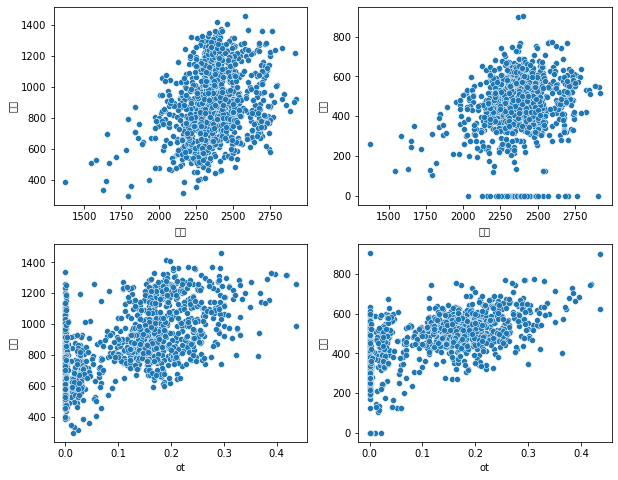

In [22]:
train["인원"] = train["정원수"] - train["휴가자수"] - train["출장자수"] - train["재택근무자수"]
train["ot"] = np.round(train["시간외승인건수"] / train["인원"], 3)

figure, ((a1,a2),(b1,b2)) = plt.subplots(2,2)
figure.set_size_inches(10,8)

sns.scatterplot(data=train, y='중식', x="인원", ax=a1, ci=False)
sns.scatterplot(data=train, y='석식', x="인원", ax=a2, ci=False)
sns.scatterplot(data=train, y='중식', x="ot", ax=b1, ci=False)
sns.scatterplot(data=train, y='석식', x="ot", ax=b2, ci=False)

##### 재택근무자수 Normalization (MinMaxScaler)

In [23]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

In [24]:
m_col = ["재택근무자수","시간외승인건수"]
train_mscale = mm_scaler.fit_transform(train[m_col])
df_mscale = pd.DataFrame(train_mscale, columns = ['m_a','m_b'])

train = pd.concat([train, df_mscale], axis=1)

In [25]:
test["인원"] = test["정원수"] - test["휴가자수"] - test["출장자수"] - test["재택근무자수"]
test["ot"] = np.round(test["시간외승인건수"] / test["인원"], 3) 

## MinMaxScaler
test_mscale = mm_scaler.fit_transform(test[m_col])
df_mscale = pd.DataFrame(test_mscale, columns = ['m_a','m_b'])

test = pd.concat([test, df_mscale], axis=1)

<AxesSubplot:>

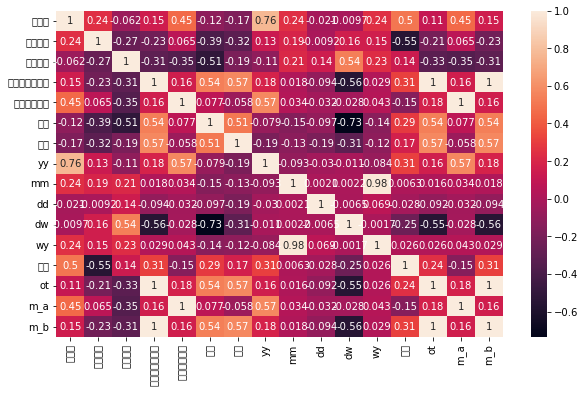

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)

##### 중식메뉴, 석식메뉴

In [27]:
train.head(3)
for i in range(0,5):
    print(train.loc[i,"중식메뉴"])    
# train.loc[0,"중식메뉴"]    

쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) 
카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침  견과류조림  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채  청경채무침  요구르트  포기김치 (배추,고추가루:국내산) 


In [28]:
txt = '카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침  견과류조림  요구르트  포기김치 (배추,고추가루:국내산)'
txt_split = txt.split(" ")

txt_tmp = []
for t in txt_split:    
    if len(t) > 1:
#         print(t, len(t))
        txt_tmp.append(t)
txt_tmp   

txt_fin = []    
txt_fin.append(txt_tmp[0])    
txt_fin.append(txt_tmp[2])
txt_fin.append(txt_tmp[3])
txt_fin 

['카레덮밥', '팽이장국', '치킨핑거']

In [29]:
def menu_choice(txt):
    txt_split = txt.split(" ")
    
    txt_tmp = []
    for t in txt_split:    
        if len(t) > 1:
            txt_tmp.append(t)

    if len(txt_tmp) > 3:
        txt_fin = []                
        txt_fin.append(txt_tmp[0])    
        txt_fin.append(txt_tmp[2])
        txt_fin.append(txt_tmp[3])
    else:
        txt_fin = 0
    
    return txt_fin

In [30]:
train["m_l"] = train["중식메뉴"].apply(menu_choice)
train["m_d"] = train["석식메뉴"].apply(menu_choice)

In [31]:
m_col = ["중식메뉴","m_l","석식메뉴","m_d"]
train[m_col].head(3)

,중식메뉴,m_l,석식메뉴,m_d
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기]","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...","[쌀밥/잡곡밥, 육개장, 자반고등어구이]"
1,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김]","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...","[콩나물밥*양념장, 어묵국, 유산슬]"
2,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","[카레덮밥, 팽이장국, 치킨핑거]","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이]"


In [32]:
# 석식메뉴 0 인 경우, 체크 예시 :
train.loc[train["m_d"] == 0, "석식메뉴"].shape

(42,)

In [33]:
# (중/석)메뉴 분리 예시 :

lst_menu_l0 = []    # 주식 rice
lst_menu_l1 = []    # 국 soup
lst_menu_l2 = []    # 반찬 main dish

# for i, menu in enumerate(train["m_l"]):
for menu in train["m_l"]:
    lst_menu_l0.append(menu[0])
    lst_menu_l1.append(menu[1])
    lst_menu_l2.append(menu[2])
    

lst_menu_d0 = []    # 주식 rice
lst_menu_d1 = []    # 국 soup
lst_menu_d2 = []    # 반찬 main dish

# for i, menu in enumerate(train["m_l"]):
for menu in train["m_d"]:
    if menu != 0:
        lst_menu_d0.append(menu[0])
        lst_menu_d1.append(menu[1])
        lst_menu_d2.append(menu[2])    

In [34]:
len(lst_menu_d0)  # 1163
len(set(lst_menu_d0))  #125

125

In [35]:
df_menu_all = pd.concat([pd.DataFrame(lst_menu_l0, columns=["L주식"]),
                         pd.DataFrame(lst_menu_l1, columns=["L국"]),
                         pd.DataFrame(lst_menu_l2, columns=["L반찬"]),
                         pd.DataFrame(lst_menu_d0, columns=["D주식"]),
                         pd.DataFrame(lst_menu_d1, columns=["D국"]),
                         pd.DataFrame(lst_menu_d2, columns=["D반찬"])], axis=1)

print(df_menu_all.shape)
df_menu_all.head(3)

(1205, 6)


,L주식,L국,L반찬,D주식,D국,D반찬
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이


In [36]:
train = pd.concat([train, df_menu_all], axis=1)
train.shape

(1205, 30)

In [37]:
# (중/석)메뉴별 가짓수(대략적 수치)
print(train["L주식"].nunique(),train["L국"].nunique(),train["L반찬"].nunique())
train["D주식"].nunique(),train["D국"].nunique(),train["D반찬"].nunique()

75 336 435


(125, 387, 479)

<AxesSubplot:xlabel='D반찬', ylabel='석식'>

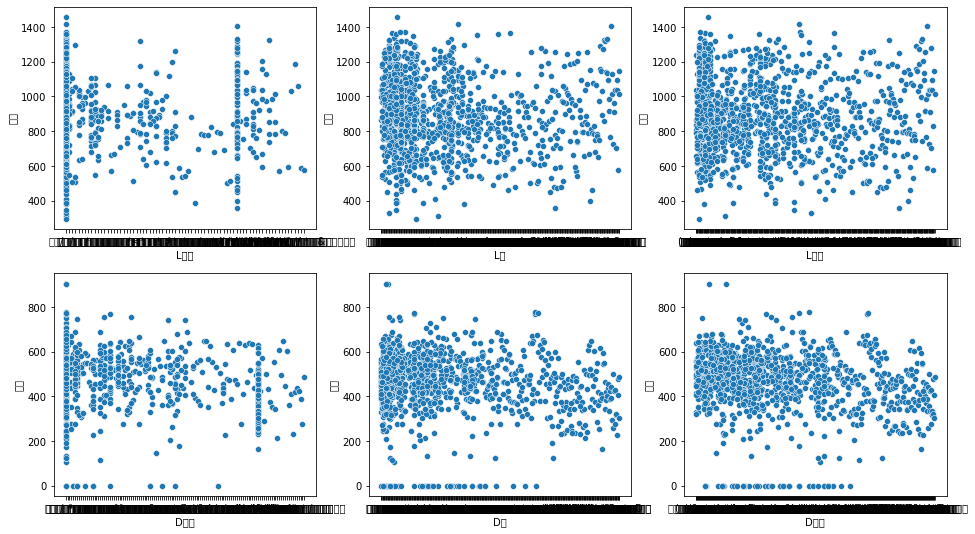

In [38]:
figure, ax = plt.subplots(2,3)
figure.set_size_inches(16,9)

sns.scatterplot(data=train, x="L주식", y="중식", ax=ax[0,0])
sns.scatterplot(data=train, x="L국", y="중식", ax=ax[0,1])
sns.scatterplot(data=train, x="L반찬", y="중식", ax=ax[0,2])

sns.scatterplot(data=train, x="D주식", y="석식", ax=ax[1,0])
sns.scatterplot(data=train, x="D국", y="석식", ax=ax[1,1])
sns.scatterplot(data=train, x="D반찬", y="석식", ax=ax[1,2])

##### 중/석식 평균 식사인원 기준 평가지표 추가:

In [39]:
# sns.boxplot(data=train, y='중식')
train['중식'].describe()   # 1032, 1032~758,  758 ~

# sns.boxplot(data=train, y='석식')
train['석식'].describe()   # 545, 545~406, 406 ~

count    1205.000000
mean      461.772614
std       139.179202
min         0.000000
25%       406.000000
50%       483.000000
75%       545.000000
max       905.000000
Name: 석식, dtype: float64

In [40]:
train.head(1)

,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,m_a,m_b,m_l,m_d,L주식,L국,L반찬,D주식,D국,D반찬
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0.0,0.227969,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기]","[쌀밥/잡곡밥, 육개장, 자반고등어구이]",쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이


In [41]:
# 중식 : 

df_pivot_l0 = pd.pivot_table(data=train, index="L주식", values="중식").reset_index()
lst_l0_2 = df_pivot_l0.loc[df_pivot_l0["중식"] >= 1032, "L주식"]  # 1032, 1032~758,  758 ~
lst_l0_1 = df_pivot_l0.loc[(df_pivot_l0["중식"] >= 758) & (df_pivot_l0["중식"] < 1032), "L주식"]
lst_l0_0 = df_pivot_l0.loc[df_pivot_l0["중식"] < 758, "L주식"]

df_pivot_l1 = pd.pivot_table(data=train, index="L국", values="중식").reset_index()
lst_l1_2 = df_pivot_l1.loc[df_pivot_l1["중식"] >= 1032, "L국"]  # 1032, 1032~758,  758 ~
lst_l1_1 = df_pivot_l1.loc[(df_pivot_l1["중식"] >= 758) & (df_pivot_l1["중식"] < 1032), "L국"]
lst_l1_0 = df_pivot_l1.loc[df_pivot_l1["중식"] < 758, "L국"]

df_pivot_l2 = pd.pivot_table(data=train, index="L반찬", values="중식").reset_index()
lst_l2_2 = df_pivot_l2.loc[df_pivot_l2["중식"] >= 1032, "L반찬"]  # 1032, 1032~758,  758 ~
lst_l2_1 = df_pivot_l2.loc[(df_pivot_l2["중식"] >= 758) & (df_pivot_l2["중식"] < 1032), "L반찬"]
lst_l2_0 = df_pivot_l2.loc[df_pivot_l2["중식"] < 758, "L반찬"]

In [42]:
for l in lst_l0_0:
    for t in range(0, len(train)):
        if (train.loc[t, "L주식"] == l):
            train.loc[t, "L주식_s"] = 0            
for l in lst_l0_1:
    for t in range(0, len(train)):
        if (train.loc[t, "L주식"] == l):
            train.loc[t, "L주식_s"] = 1            
for l in lst_l0_2:
    for t in range(0, len(train)):
        if (train.loc[t, "L주식"] == l):
            train.loc[t, "L주식_s"] = 2 
            
for l in lst_l1_0:
    for t in range(0, len(train)):
        if (train.loc[t, "L국"] == l):
            train.loc[t, "L국_s"] = 0            
for l in lst_l1_1:
    for t in range(0, len(train)):
        if (train.loc[t, "L국"] == l):
            train.loc[t, "L국_s"] = 1            
for l in lst_l1_2:
    for t in range(0, len(train)):
        if (train.loc[t, "L국"] == l):
            train.loc[t, "L국_s"] = 2 
            
for l in lst_l2_0:
    for t in range(0, len(train)):
        if (train.loc[t, "L반찬"] == l):
            train.loc[t, "L반찬_s"] = 0            
for l in lst_l2_1:
    for t in range(0, len(train)):
        if (train.loc[t, "L반찬"] == l):
            train.loc[t, "L반찬_s"] = 1            
for l in lst_l2_2:
    for t in range(0, len(train)):
        if (train.loc[t, "L반찬"] == l):
            train.loc[t, "L반찬_s"] = 2             

In [43]:
l_col = ["L주식_s","L국_s","L반찬_s"]
train[l_col].head()

,L주식_s,L국_s,L반찬_s
0,1.0,2.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [44]:
# 석식 : 

df_pivot_d0 = pd.pivot_table(data=train, index="D주식", values="석식").reset_index()
lst_d0_2 = df_pivot_d0.loc[df_pivot_d0["석식"] >= 545, "D주식"]  # 545, 545~406, 406 ~
lst_d0_1 = df_pivot_d0.loc[(df_pivot_d0["석식"] >= 406) & (df_pivot_d0["석식"] < 545), "D주식"]
lst_d0_0 = df_pivot_d0.loc[df_pivot_d0["석식"] < 406, "D주식"]

df_pivot_d1 = pd.pivot_table(data=train, index="D국", values="석식").reset_index()
lst_d1_2 = df_pivot_d1.loc[df_pivot_d1["석식"] >= 545, "D국"]  # 545, 545~406, 406 ~
lst_d1_1 = df_pivot_d1.loc[(df_pivot_d1["석식"] >= 406) & (df_pivot_d1["석식"] < 545), "D국"]
lst_d1_0 = df_pivot_d1.loc[df_pivot_d1["석식"] < 406, "D국"]

df_pivot_d2 = pd.pivot_table(data=train, index="D반찬", values="석식").reset_index()
lst_d2_2 = df_pivot_d2.loc[df_pivot_d2["석식"] >= 545, "D반찬"]  # 545, 545~406, 406 ~
lst_d2_1 = df_pivot_d2.loc[(df_pivot_d2["석식"] >= 406) & (df_pivot_d2["석식"] < 545), "D반찬"]
lst_d2_0 = df_pivot_d2.loc[df_pivot_d2["석식"] < 406, "D반찬"]

In [45]:
for l in lst_d0_0:
    for t in range(0, len(train)):
        if (train.loc[t, "D주식"] == l):
            train.loc[t, "D주식_s"] = 0            
for l in lst_d0_1:
    for t in range(0, len(train)):
        if (train.loc[t, "D주식"] == l):
            train.loc[t, "D주식_s"] = 1            
for l in lst_d0_2:
    for t in range(0, len(train)):
        if (train.loc[t, "D주식"] == l):
            train.loc[t, "D주식_s"] = 2 
# D주식 에 대한 결측치 NaN 처리용 :            
train.loc[train["D주식"].isna() == True, "D주식_s"] = 4 
            
for l in lst_d1_0:
    for t in range(0, len(train)):
        if (train.loc[t, "D국"] == l):
            train.loc[t, "D국_s"] = 0            
for l in lst_d1_1:
    for t in range(0, len(train)):
        if (train.loc[t, "D국"] == l):
            train.loc[t, "D국_s"] = 1            
for l in lst_d1_2:
    for t in range(0, len(train)):
        if (train.loc[t, "D국"] == l):
            train.loc[t, "D국_s"] = 2 
# D국 에 대한 결측치 NaN 처리용 :            
train.loc[train["D국"].isna() == True, "D국_s"] = 4 


for l in lst_d2_0:
    for t in range(0, len(train)):
        if (train.loc[t, "D반찬"] == l):
            train.loc[t, "D반찬_s"] = 0            
for l in lst_d2_1:
    for t in range(0, len(train)):
        if (train.loc[t, "D반찬"] == l):
            train.loc[t, "D반찬_s"] = 1            
for l in lst_d2_2:
    for t in range(0, len(train)):
        if (train.loc[t, "D반찬"] == l):
            train.loc[t, "D반찬_s"] = 2           
# D반찬 에 대한 결측치 NaN 처리용 :            
train.loc[train["D반찬"].isna() == True, "D반찬_s"] = 4 

In [46]:
d_col = ["D주식_s","D국_s","D반찬_s"]
train[d_col].head()
# train[d_col].isnull().sum()

,D주식_s,D국_s,D반찬_s
0,1.0,1.0,1.0
1,2.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,0.0,1.0


In [47]:
## for Test dataset :

test["m_l"] = test["중식메뉴"].apply(menu_choice)
test["m_d"] = test["석식메뉴"].apply(menu_choice)

# (중/석)메뉴 분리 예시 :
lst_menu_l0 = []    # 주식 rice
lst_menu_l1 = []    # 국 soup
lst_menu_l2 = []    # 반찬 main dish
for menu in test["m_l"]:
    lst_menu_l0.append(menu[0])
    lst_menu_l1.append(menu[1])
    lst_menu_l2.append(menu[2])

lst_menu_d0 = []    # 주식 rice
lst_menu_d1 = []    # 국 soup
lst_menu_d2 = []    # 반찬 main dish
for menu in test["m_d"]:
    if menu != 0:
        lst_menu_d0.append(menu[0])
        lst_menu_d1.append(menu[1])
        lst_menu_d2.append(menu[2])    
        
df_menu_all = pd.concat([pd.DataFrame(lst_menu_l0, columns=["L주식"]),
                         pd.DataFrame(lst_menu_l1, columns=["L국"]),
                         pd.DataFrame(lst_menu_l2, columns=["L반찬"]),
                         pd.DataFrame(lst_menu_d0, columns=["D주식"]),
                         pd.DataFrame(lst_menu_d1, columns=["D국"]),
                         pd.DataFrame(lst_menu_d2, columns=["D반찬"])], axis=1)

test = pd.concat([test, df_menu_all], axis=1)

print(test.shape)
test.head(1)

(50, 27)


,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,m_a,m_b,m_l,m_d,L주식,L국,L반찬,D주식,D국,D반찬
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,...,0.764957,0.004985,"[쌀밥/흑미밥/찰현미밥, 매운돈갈비찜, 오꼬노미계란말이]","[흑미밥, 쇠고기우엉볶음, 버섯햄볶음]",쌀밥/흑미밥/찰현미밥,매운돈갈비찜,오꼬노미계란말이,흑미밥,쇠고기우엉볶음,버섯햄볶음


In [48]:
train.columns
m_col = ['L주식', 'L국', 'L반찬', 'D주식', 'D국', 'D반찬']
train[m_col].head(3)

,L주식,L국,L반찬,D주식,D국,D반찬
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이


In [49]:
for l in lst_l0_0:
    for t in range(0, len(test)):
        if (test.loc[t, "L주식"] == l):
            test.loc[t, "L주식_s"] = 0            
for l in lst_l0_1:
    for t in range(0, len(test)):
        if (test.loc[t, "L주식"] == l):
            test.loc[t, "L주식_s"] = 1            
for l in lst_l0_2:
    for t in range(0, len(test)):
        if (test.loc[t, "L주식"] == l):
            test.loc[t, "L주식_s"] = 2 
test.loc[test["L주식_s"].isna() == True, "L주식_s"] = 4             

for l in lst_l1_0:
    for t in range(0, len(test)):
        if (test.loc[t, "L국"] == l):
            test.loc[t, "L국_s"] = 0            
for l in lst_l1_1:
    for t in range(0, len(test)):
        if (test.loc[t, "L국"] == l):
            test.loc[t, "L국_s"] = 1            
for l in lst_l1_2:
    for t in range(0, len(test)):
        if (test.loc[t, "L국"] == l):
            test.loc[t, "L국_s"] = 2 
test.loc[test["L국_s"].isna() == True, "L국_s"] = 4             
            
for l in lst_l2_0:
    for t in range(0, len(test)):
        if (test.loc[t, "L반찬"] == l):
            test.loc[t, "L반찬_s"] = 0            
for l in lst_l2_1:
    for t in range(0, len(test)):
        if (test.loc[t, "L반찬"] == l):
            test.loc[t, "L반찬_s"] = 1            
for l in lst_l2_2:
    for t in range(0, len(test)):
        if (test.loc[t, "L반찬"] == l):
            test.loc[t, "L반찬_s"] = 2          
test.loc[test["L반찬_s"].isna() == True, "L반찬_s"] = 4             

In [50]:
l_col = ["L주식_s","L국_s","L반찬_s"]
test[l_col].head()

,L주식_s,L국_s,L반찬_s
0,1.0,1.0,4.0
1,2.0,2.0,4.0
2,1.0,4.0,4.0
3,1.0,1.0,1.0
4,2.0,4.0,4.0


In [51]:
for l in lst_d0_0:
    for t in range(0, len(test)):
        if (test.loc[t, "D주식"] == l):
            test.loc[t, "D주식_s"] = 0            
for l in lst_d0_1:
    for t in range(0, len(test)):
        if (test.loc[t, "D주식"] == l):
            test.loc[t, "D주식_s"] = 1            
for l in lst_d0_2:
    for t in range(0, len(test)):
        if (test.loc[t, "D주식"] == l):
            test.loc[t, "D주식_s"] = 2 
# D주식 에 대한 결측치 NaN 처리용 :            
test.loc[test["D주식"].isna() == True, "D주식_s"] = 4 
test.loc[test["D주식_s"].isna() == True, "D주식_s"] = 4 
            
for l in lst_d1_0:
    for t in range(0, len(test)):
        if (test.loc[t, "D국"] == l):
            test.loc[t, "D국_s"] = 0            
for l in lst_d1_1:
    for t in range(0, len(test)):
        if (test.loc[t, "D국"] == l):
            test.loc[t, "D국_s"] = 1            
for l in lst_d1_2:
    for t in range(0, len(test)):
        if (test.loc[t, "D국"] == l):
            test.loc[t, "D국_s"] = 2 
# D국 에 대한 결측치 NaN 처리용 :            
test.loc[test["D국"].isna() == True, "D국_s"] = 4 
test.loc[test["D국_s"].isna() == True, "D국_s"] = 4 


for l in lst_d2_0:
    for t in range(0, len(test)):
        if (test.loc[t, "D반찬"] == l):
            test.loc[t, "D반찬_s"] = 0            
for l in lst_d2_1:
    for t in range(0, len(test)):
        if (test.loc[t, "D반찬"] == l):
            test.loc[t, "D반찬_s"] = 1            
for l in lst_d2_2:
    for t in range(0, len(test)):
        if (test.loc[t, "D반찬"] == l):
            test.loc[t, "D반찬_s"] = 2           
# D반찬 에 대한 결측치 NaN 처리용 :            
test.loc[test["D반찬"].isna() == True, "D반찬_s"] = 4 
test.loc[test["D반찬_s"].isna() == True, "D반찬_s"] = 4 

In [52]:
d_col = ["D주식_s","D국_s","D반찬_s"]
test[d_col].head()
# train[d_col].isnull().sum()

,D주식_s,D국_s,D반찬_s
0,0.0,4.0,4.0
1,1.0,1.0,2.0
2,0.0,4.0,4.0
3,0.0,4.0,4.0
4,0.0,0.0,4.0


In [53]:
test.head(1)

,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,L반찬,D주식,D국,D반찬,L주식_s,L국_s,L반찬_s,D주식_s,D국_s,D반찬_s
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,...,오꼬노미계란말이,흑미밥,쇠고기우엉볶음,버섯햄볶음,1.0,1.0,4.0,0.0,4.0,4.0


##### Label encoding for menus

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le_l0 = LabelEncoder()
le_l1 = LabelEncoder()
le_l2 = LabelEncoder()
le_d0 = LabelEncoder()
le_d1 = LabelEncoder()
le_d2 = LabelEncoder()

In [56]:
# train & test 메뉴 통합 후, le.fit 수행 (label encoding 공통화 목적)

le_l0.fit(pd.concat([train['L주식'], test['L주식']]))
le_l1.fit(pd.concat([train['L국'], test['L국']]))
le_l2.fit(pd.concat([train['L반찬'], test['L반찬']]))

le_d0.fit(pd.concat([train['D주식'], test['D주식']]))
le_d1.fit(pd.concat([train['D국'], test['D국']]))
le_d2.fit(pd.concat([train['D반찬'], test['D반찬']]))

LabelEncoder()

In [57]:
train["L주식"].head(3)

0    쌀밥/잡곡밥
1    쌀밥/잡곡밥
2      카레덮밥
Name: L주식, dtype: object

In [58]:
arr_le_l0 = le_l0.fit_transform(train["L주식"])
arr_le_l1 = le_l1.fit_transform(train["L국"])
arr_le_l2 = le_l2.fit_transform(train["L반찬"])

arr_le_d0 = le_d0.fit_transform(train["D주식"])
arr_le_d1 = le_d1.fit_transform(train["D국"])
arr_le_d2 = le_d2.fit_transform(train["D반찬"])

In [59]:
df_menu_le = pd.concat([pd.DataFrame(arr_le_l0, columns=["L0"]),
                         pd.DataFrame(arr_le_l1, columns=["L1"]),
                         pd.DataFrame(arr_le_l2, columns=["L2"]),
                         pd.DataFrame(arr_le_d0, columns=["D0"]),
                         pd.DataFrame(arr_le_d1, columns=["D1"]),
                         pd.DataFrame(arr_le_d2, columns=["D2"])], axis=1)

print(df_menu_le.shape)
df_menu_le.head(3)

(1205, 6)


,L0,L1,L2,D0,D1,D2
0,51,248,271,68,307,381
1,51,41,33,110,266,375
2,69,314,377,68,335,470


In [60]:
train = pd.concat([train, df_menu_le], axis=1)
print(train.shape)
train.head(1)

(1205, 42)


,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,L반찬_s,D주식_s,D국_s,D반찬_s,L0,L1,L2,D0,D1,D2
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,1.0,1.0,1.0,1.0,51,248,271,68,307,381


In [61]:
## for Test dataset :

arr_le_l0 = le_l0.fit_transform(test["L주식"])
arr_le_l1 = le_l1.fit_transform(test["L국"])
arr_le_l2 = le_l2.fit_transform(test["L반찬"])

arr_le_d0 = le_d0.fit_transform(test["D주식"])
arr_le_d1 = le_d1.fit_transform(test["D국"])
arr_le_d2 = le_d2.fit_transform(test["D반찬"])

df_menu_le = pd.concat([pd.DataFrame(arr_le_l0, columns=["L0"]),
                         pd.DataFrame(arr_le_l1, columns=["L1"]),
                         pd.DataFrame(arr_le_l2, columns=["L2"]),
                         pd.DataFrame(arr_le_d0, columns=["D0"]),
                         pd.DataFrame(arr_le_d1, columns=["D1"]),
                         pd.DataFrame(arr_le_d2, columns=["D2"])], axis=1)

test = pd.concat([test, df_menu_le], axis=1)
print(test.shape)
test.head(1)

(50, 39)


,일자,요일,정원수,휴가자수,출장자수,시간외승인건수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,L반찬_s,D주식_s,D국_s,D반찬_s,L0,L1,L2,D0,D1,D2
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,...,4.0,0.0,4.0,4.0,11,15,40,14,27,25


In [62]:
train.loc[0,]
train.shape, test.shape
train.columns, test.columns

(Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', '조식메뉴', '중식메뉴',
        '석식메뉴', '중식', '석식', 'yy', 'mm', 'dd', 'dw', 'wy', 'yymm', '인원', 'ot',
        'm_a', 'm_b', 'm_l', 'm_d', 'L주식', 'L국', 'L반찬', 'D주식', 'D국', 'D반찬',
        'L주식_s', 'L국_s', 'L반찬_s', 'D주식_s', 'D국_s', 'D반찬_s', 'L0', 'L1', 'L2',
        'D0', 'D1', 'D2'],
       dtype='object'),
 Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', '조식메뉴', '중식메뉴',
        '석식메뉴', 'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 'm_a', 'm_b', 'm_l',
        'm_d', 'L주식', 'L국', 'L반찬', 'D주식', 'D국', 'D반찬', 'L주식_s', 'L국_s', 'L반찬_s',
        'D주식_s', 'D국_s', 'D반찬_s', 'L0', 'L1', 'L2', 'D0', 'D1', 'D2'],
       dtype='object'))

In [63]:
train.columns

Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', '조식메뉴', '중식메뉴',
       '석식메뉴', '중식', '석식', 'yy', 'mm', 'dd', 'dw', 'wy', 'yymm', '인원', 'ot',
       'm_a', 'm_b', 'm_l', 'm_d', 'L주식', 'L국', 'L반찬', 'D주식', 'D국', 'D반찬',
       'L주식_s', 'L국_s', 'L반찬_s', 'D주식_s', 'D국_s', 'D반찬_s', 'L0', 'L1', 'L2',
       'D0', 'D1', 'D2'],
      dtype='object')

### 5. Modeling
#### 5-1) Feature selection

##### for RF

In [64]:
f_names_l = ['정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', 
             'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
             'L주식_s', 'L국_s', 'L반찬_s','D주식_s', 'D국_s', 'D반찬_s', 
             'L0', 'L1', 'L2', 'D0', 'D1', 'D2', 'm_a', 'm_b']     

# f_names_d = ['정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', 
#              'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
#              'L주식_s', 'L국_s', 'L반찬_s','D주식_s', 'D국_s', 'D반찬_s', 
#              'L0', 'L1', 'L2', 'D0', 'D1', 'D2', 'm_a', 'm_b']  
f_names_d = ['정원수', '휴가자수', '출장자수', 
             'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
             'D주식_s', 'D국_s', 'D반찬_s', 
             'L1', 'L2', 'D0', 'D1', 'D2', 'm_a', 'm_b']   

##### for GB

In [65]:
# f_names_l = ['정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', 
#              'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
#              'L주식_s', 'L국_s', 'L반찬_s','D주식_s', 'D국_s', 'D반찬_s', 
#              'L0', 'L1', 'L2', 'D0', 'D1', 'D2', 'm_a', 'm_b']     
f_names_l = ['정원수', '휴가자수', '출장자수', '시간외승인건수',
             'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
             'L국_s', 'L반찬_s','D국_s', 'D반찬_s', 
             'L1', 'D1', 'D2', 'm_b']     


# f_names_d = ['정원수', '휴가자수', '출장자수', '시간외승인건수', '재택근무자수', 
#              'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
#              'L주식_s', 'L국_s', 'L반찬_s','D주식_s', 'D국_s', 'D반찬_s', 
#              'L0', 'L1', 'L2', 'D0', 'D1', 'D2', 'm_a', 'm_b']  
f_names_d = ['휴가자수', '출장자수', '시간외승인건수', 
             'yy', 'mm', 'dd', 'dw', 'wy', '인원', 'ot', 
             'D주식_s', 'D국_s', 'D반찬_s', 
             'm_b']  

In [66]:
X_train_l = train[f_names_l]
y_train_l = train['중식']

X_train_d = train[f_names_d]
y_train_d = train['석식']

In [67]:
X_test_l = test[f_names_l]
X_test_d = test[f_names_d]

#### 5-2) Model : RandomForest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_reg_l = RandomForestRegressor(random_state=44)
rf_reg_d = RandomForestRegressor(random_state=44)

In [70]:
## After tuning :
rf_reg_l = RandomForestRegressor(max_depth=23, n_estimators=150, random_state=44)
rf_reg_d = RandomForestRegressor(max_depth=28, n_estimators=316, random_state=44)

In [71]:
rf_reg_l.fit(X_train_l, y_train_l)

RandomForestRegressor(max_depth=23, n_estimators=150, random_state=44)

In [72]:
rf_reg_d.fit(X_train_d, y_train_d)

RandomForestRegressor(max_depth=28, n_estimators=316, random_state=44)

In [73]:
pred_l = rf_reg_l.predict(X_test_l)
pred_d = rf_reg_d.predict(X_test_d)

##### RF - feature importance :

In [74]:
pd.DataFrame(rf_reg_l.feature_importances_, 
             index=X_train_l.columns, 
             columns=["f_importance"]).sort_values(by='f_importance')

,f_importance
L국_s,0.004419
D국_s,0.005603
D반찬_s,0.007242
mm,0.009222
yy,0.010853
L1,0.013481
dd,0.015027
D1,0.015543
정원수,0.016390
D2,0.016785


In [75]:
pd.DataFrame(rf_reg_d.feature_importances_, 
             index=X_train_d.columns, 
             columns=["f_importance"]).sort_values(by='f_importance')

,f_importance
D주식_s,0.015588
mm,0.018555
인원,0.031594
ot,0.032582
D국_s,0.037024
wy,0.045694
dw,0.046072
출장자수,0.052210
yy,0.070589
휴가자수,0.081525


#### 5-3) Model : GradientBoost

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
gb_reg_l = GradientBoostingRegressor(random_state=44)
gb_reg_d = GradientBoostingRegressor(random_state=44)
# n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'

In [78]:
gb_reg_l.fit(X_train_l, y_train_l)

GradientBoostingRegressor(random_state=44)

In [79]:
gb_reg_d.fit(X_train_d, y_train_d)

GradientBoostingRegressor(random_state=44)

In [80]:
pred_l = gb_reg_l.predict(X_test_l)
pred_d = gb_reg_d.predict(X_test_d)

##### GB - feature importance

In [81]:
pd.DataFrame(gb_reg_l.feature_importances_, 
             index=X_train_l.columns, 
             columns=["f_importance"]).sort_values(by='f_importance')

,f_importance
D1,0.003249
D국_s,0.004316
L1,0.004419
dd,0.004427
D2,0.005257
mm,0.006736
인원,0.007642
L국_s,0.008331
yy,0.008994
시간외승인건수,0.012059


In [82]:
pd.DataFrame(gb_reg_d.feature_importances_, 
             index=X_train_d.columns, 
             columns=["f_importance"]).sort_values(by='f_importance')

,f_importance
mm,0.012159
인원,0.012815
D주식_s,0.016320
출장자수,0.025495
dw,0.038980
wy,0.051326
D국_s,0.060343
휴가자수,0.060797
yy,0.075033
ot,0.092600


#### 5-4) Model : CatBoost

!pip install catboost

In [83]:
from catboost import CatBoostRegressor

In [84]:
cb_reg_l = CatBoostRegressor(random_seed=44)
cb_reg_d = CatBoostRegressor(random_seed=44)

### 6. Submission

In [85]:
submission.head(1)

,일자,중식계,석식계
0,2021-01-27,0,0


In [86]:
submission["중식계"] = pred_l
submission["석식계"] = pred_d
submission.head(3)

,일자,중식계,석식계
0,2021-01-27,1055.410394,264.688784
1,2021-01-28,965.802490,447.571101
2,2021-01-29,680.172045,246.860580


In [87]:
submission.to_csv('dacon_lh-220308_1410.csv', index=False)

### 6. Evaluation (Validation)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [89]:
X_fit_l, X_val_l, y_fit_l, y_val_l = train_test_split(X_train_l, y_train_l, shuffle=False,
                                                      test_size=0.1, random_state=44)
X_fit_d, X_val_d, y_fit_d, y_val_d = train_test_split(X_train_d, y_train_d, shuffle=False,
                                                      test_size=0.1, random_state=44)
print(len(X_train_l))
print(len(X_fit_l), len(X_val_l))
print(len(X_fit_d), len(X_val_d))

1205
1084 121
1084 121


In [90]:
# for RF
rf_reg_l.fit(X_fit_l, y_fit_l)
rf_reg_d.fit(X_fit_d, y_fit_d)

pred_val_l = rf_reg_l.predict(X_val_l)
pred_val_d = rf_reg_d.predict(X_val_d)

In [91]:
# for GB
gb_reg_l.fit(X_fit_l, y_fit_l)
gb_reg_d.fit(X_fit_d, y_fit_d)

pred_val_l = gb_reg_l.predict(X_val_l)
pred_val_d = gb_reg_d.predict(X_val_d)

In [92]:
score_l = mean_absolute_error(y_val_l, pred_val_l)
score_d = mean_absolute_error(y_val_d, pred_val_d)

print(f"점심 : {score_l:.5f}, \n저녁 : {score_d:.5f}, \n평균 : {(score_l+score_d)/2:.5f}")

## RF : 
# 78.09804(76.64+79.55)   ->  87.719
# 78.65674(75.97+81.33)   ->  88.727
# 78.92174(77.129+80.713) ->  87.633


## GB : 
# 83.84128(76.194+91.488)->  94.171
# 86.21452(76.70+95.71)  ->  95.1473

점심 : 76.19404, 
저녁 : 91.48853, 
평균 : 83.84128


### 7. Tuning 

#### 7-1) Grid Search CV

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [94]:
params_l = {
    "n_estimators" : [142,135,150],
    "max_depth" : [17,18,23],
#     "min_samples_split" : [2,6,10],
#     "min_samples_leaf" : [1,3,5],
#     "min_weight_fraction_leaf" : [0.0,0.2,0.5,1.0]
}

params_d = {
    "n_estimators" : [316,310,320],
    "max_depth" : [27,28,30],
#     "min_samples_split" : [2,6,10],
#     "min_samples_leaf" : [1,3,5],
#     "min_weight_fraction_leaf" : [0.0,0.2,0.5,1.0]
}

In [95]:
rf_reg_l_tun = RandomForestRegressor(random_state=44)
rf_reg_d_tun = RandomForestRegressor(random_state=44)

In [96]:
grid_l = GridSearchCV(rf_reg_l_tun, param_grid=params_l, cv=5, n_jobs=-1, verbose=1)
grid_l.fit(X_train_l, y_train_l)

print(f"L - Best params : {grid_l.best_params_}")
print(f"L - Best score : {grid_l.best_score_:.5f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
L - Best params : {'max_depth': 23, 'n_estimators': 150}
L - Best score : 0.75575


In [97]:
grid_d = GridSearchCV(rf_reg_d_tun, param_grid=params_d, cv=5, n_jobs=-1, verbose=1)
grid_d.fit(X_train_d, y_train_d)

print(f"D - Best params : {grid_d.best_params_}")
print(f"D - Best score : {grid_d.best_score_:.5f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
D - Best params : {'max_depth': 30, 'n_estimators': 310}
D - Best score : 0.44815


#### 7-2) Best hyper-parameters

##### n_estimators

In [98]:
lst_hp_l = range(141,158,1)
lst_hp_d = range(310,320,1)
log_output_l = []
log_output_d = []


## for Lunch : 
for hp in lst_hp_l:
    rf_reg_l_hp = RandomForestRegressor(n_estimators=hp, random_state=44)    
    rf_reg_l_hp.fit(X_fit_l, y_fit_l)    
    
    pred_fit_l = rf_reg_l_hp.predict(X_fit_l)
    pred_val_l = rf_reg_l_hp.predict(X_val_l)
    
    score_fit_l = mean_absolute_error(y_fit_l, pred_fit_l)
    score_val_l = mean_absolute_error(y_val_l, pred_val_l)
    
    print(f"n_estimators = {hp}, score(fit) = {score_fit_l:.5f}, score(val) = {score_val_l:.5f}, score(mean) = {(score_fit_l + score_val_l) / 2:.5f}")
    log_output_l.append({
        "n_estimators" : hp,
        "fit" : score_fit_l,
        "val" : score_val_l
    })

print("\n")    

## for Dinner    
for hp in lst_hp_d:
    rf_reg_d_hp = RandomForestRegressor(n_estimators=hp, random_state=44)    
    rf_reg_d_hp.fit(X_fit_d, y_fit_d)    
    
    pred_fit_d = rf_reg_d_hp.predict(X_fit_d)
    pred_val_d = rf_reg_d_hp.predict(X_val_d)
    
    score_fit_d = mean_absolute_error(y_fit_d, pred_fit_d)
    score_val_d = mean_absolute_error(y_val_d, pred_val_d)
    
    print(f"n_estimators = {hp}, score(fit) = {score_fit_d:.5f}, score(val) = {score_val_d:.5f}, score(mean) = {(score_fit_l + score_val_l) / 2:.5f}")
    log_output_d.append({
        "n_estimators" : hp,
        "fit" : score_fit_d,
        "val" : score_val_d
    })    

df_log_l = pd.DataFrame(log_output_l)
df_log_d = pd.DataFrame(log_output_d)

n_estimators = 141, score(fit) = 26.18580, score(val) = 78.43204, score(mean) = 52.30892
n_estimators = 142, score(fit) = 26.19128, score(val) = 78.38092, score(mean) = 52.28610
n_estimators = 143, score(fit) = 26.16965, score(val) = 78.38947, score(mean) = 52.27956
n_estimators = 144, score(fit) = 26.16512, score(val) = 78.61874, score(mean) = 52.39193
n_estimators = 145, score(fit) = 26.16277, score(val) = 78.61060, score(mean) = 52.38669
n_estimators = 146, score(fit) = 26.15074, score(val) = 78.57970, score(mean) = 52.36522
n_estimators = 147, score(fit) = 26.15402, score(val) = 78.42031, score(mean) = 52.28716
n_estimators = 148, score(fit) = 26.15296, score(val) = 78.52317, score(mean) = 52.33806
n_estimators = 149, score(fit) = 26.14216, score(val) = 78.62128, score(mean) = 52.38172
n_estimators = 150, score(fit) = 26.13245, score(val) = 78.65333, score(mean) = 52.39289
n_estimators = 151, score(fit) = 26.11712, score(val) = 78.55416, score(mean) = 52.33564
n_estimators = 152, s

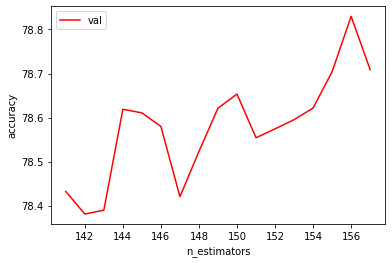

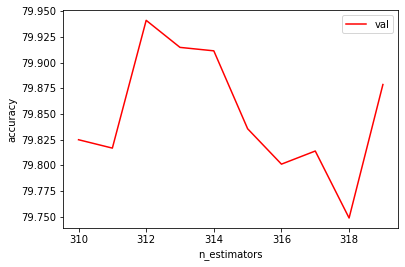

In [99]:
## for Lunch :
# plt.plot(df_log_l["n_estimators"], df_log_l["fit"], label="fit", color='b')
plt.plot(df_log_l["n_estimators"], df_log_l["val"], label="val", color='r')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## for Dinner :
# plt.plot(df_log_d["n_estimators"], df_log_d["fit"], label="fit", color='b')
plt.plot(df_log_d["n_estimators"], df_log_d["val"], label="val", color='r')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()

##### max_depth

In [100]:
lst_hp_l = range(15,25,1)
lst_hp_d = range(25,35,1)
log_output_l = []
log_output_d = []


## for Lunch : 
for hp in lst_hp_l:
    rf_reg_l_hp = RandomForestRegressor(max_depth=hp, random_state=44)    
    rf_reg_l_hp.fit(X_fit_l, y_fit_l)    
    
    pred_fit_l = rf_reg_l_hp.predict(X_fit_l)
    pred_val_l = rf_reg_l_hp.predict(X_val_l)
    
    score_fit_l = mean_absolute_error(y_fit_l, pred_fit_l)
    score_val_l = mean_absolute_error(y_val_l, pred_val_l)
    
    print(f"max_depth = {hp}, score(fit) = {score_fit_l:.5f}, score(val) = {score_val_l:.5f}, score(mean) = {(score_fit_l + score_val_l) / 2:.5f}")
    log_output_l.append({
        "max_depth" : hp,
        "fit" : score_fit_l,
        "val" : score_val_l
    })

print("\n")    

## for Dinner    
for hp in lst_hp_d:
    rf_reg_d_hp = RandomForestRegressor(max_depth=hp, random_state=44)    
    rf_reg_d_hp.fit(X_fit_d, y_fit_d)    
    
    pred_fit_d = rf_reg_d_hp.predict(X_fit_d)
    pred_val_d = rf_reg_d_hp.predict(X_val_d)
    
    score_fit_d = mean_absolute_error(y_fit_d, pred_fit_d)
    score_val_d = mean_absolute_error(y_val_d, pred_val_d)
    
    print(f"max_depth = {hp}, score(fit) = {score_fit_d:.5f}, score(val) = {score_val_d:.5f}, score(mean) = {(score_fit_l + score_val_l) / 2:.5f}")
    log_output_d.append({
        "max_depth" : hp,
        "fit" : score_fit_d,
        "val" : score_val_d
    })    

df_log_l = pd.DataFrame(log_output_l)
df_log_d = pd.DataFrame(log_output_d)

max_depth = 15, score(fit) = 28.91475, score(val) = 78.11983, score(mean) = 53.51729
max_depth = 16, score(fit) = 28.03706, score(val) = 78.32276, score(mean) = 53.17991
max_depth = 17, score(fit) = 27.23711, score(val) = 78.34612, score(mean) = 52.79161
max_depth = 18, score(fit) = 26.98563, score(val) = 78.61565, score(mean) = 52.80064
max_depth = 19, score(fit) = 26.64288, score(val) = 78.46820, score(mean) = 52.55554
max_depth = 20, score(fit) = 26.48563, score(val) = 79.41566, score(mean) = 52.95065
max_depth = 21, score(fit) = 26.43401, score(val) = 78.61974, score(mean) = 52.52687
max_depth = 22, score(fit) = 26.54438, score(val) = 77.93256, score(mean) = 52.23847
max_depth = 23, score(fit) = 26.51742, score(val) = 78.97734, score(mean) = 52.74738
max_depth = 24, score(fit) = 26.53976, score(val) = 78.88835, score(mean) = 52.71406


max_depth = 25, score(fit) = 18.40821, score(val) = 79.44694, score(mean) = 52.71406
max_depth = 26, score(fit) = 18.42797, score(val) = 79.94950, s

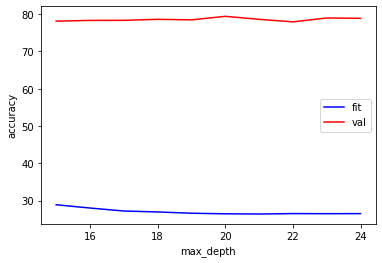

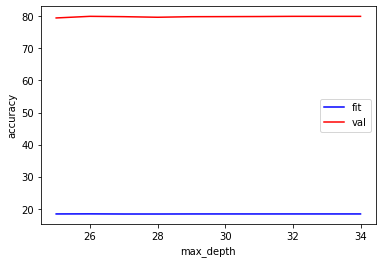

In [101]:
## for Lunch :
plt.plot(df_log_l["max_depth"], df_log_l["fit"], label="fit", color='b')
plt.plot(df_log_l["max_depth"], df_log_l["val"], label="val", color='r')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## for Dinner :
plt.plot(df_log_d["max_depth"], df_log_d["fit"], label="fit", color='b')
plt.plot(df_log_d["max_depth"], df_log_d["val"], label="val", color='r')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()